In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('bikes_rent.csv')

In [3]:
data.shape

(731, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
season            731 non-null int64
yr                731 non-null int64
mnth              731 non-null int64
holiday           731 non-null int64
weekday           731 non-null int64
workingday        731 non-null int64
weathersit        731 non-null int64
temp              731 non-null float64
atemp             731 non-null float64
hum               731 non-null float64
windspeed(mph)    731 non-null float64
windspeed(ms)     731 non-null float64
cnt               731 non-null int64
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


In [5]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


# прогноз на cnt - count (кол-во арендованых велосипедов за день)
# 4 сезона, yr- бинарный (у нас всего два года), mnth - [1:12], holiday - 1\0, weekday [0;6], workingday - 1\0, weathersit - описывает разные погодные условия (облачность, туман, снег, дождь), temp - температура факт, atemp- температура как чувствуется, hum- влажность, windspeed- скорость воздуха (внесена мультиколлинеарность (замеряна в mph и в ms) от одого нужно избавляться)

In [6]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872077,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


# можно порисовать картинки, но лучше нарисовать графики

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)


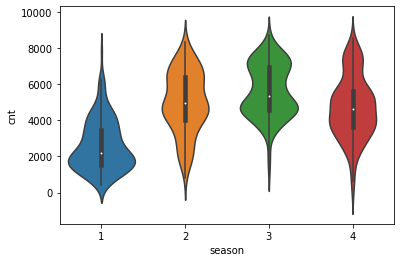

In [8]:
# зависимость к-ва арендованых от сезона (1- зима)
sns.violinplot(data['season'], data['cnt'])

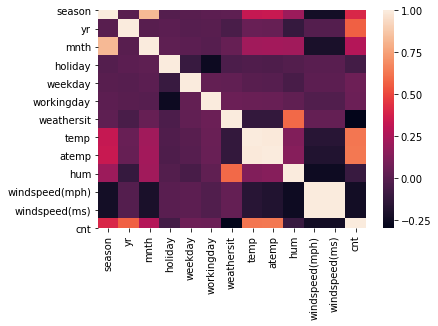

In [9]:
sns.heatmap(data.corr())

In [10]:
data.shape

(731, 13)

# у нас 12 признаков и 1 целевой. чтобы построить сразу много графиков (размер позволяет разбить их 4*3) используем plt.subplot()

# помимо размера нужен третий параметр, который укажет где строить.

# enumerate - номер итерации. должен быть > 1. его и передаём как 3 параметр

# подпишем каждый график согласо его признаку

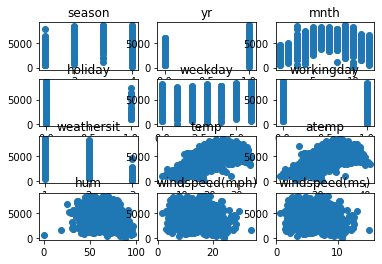

In [11]:
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(4, 3, i + 1)
    plt.scatter(data[col], data['cnt'])
    plt.title(col)

# посмотрим ближе на график по месяцам

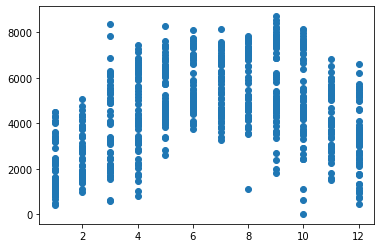

In [12]:
plt.scatter(data.mnth, data.cnt)

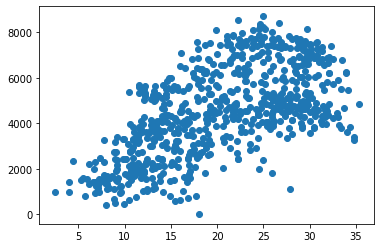

In [13]:
plt.scatter(data.temp, data.cnt)

# видно, что зависимость нелинейна, скорее параболическая, может помочь добавление квадрата признака месяца. При высокой температуре аренда тоже падает

In [14]:
# LassoCV, RidgeCV - методы, заточенные под кросс-валидацию. Можно быстрее подбирать гиппер-параметр
# StandardScaler для масштабирования

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor # сравним со случайным лесом
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [15]:
linreg = LinearRegression()
lasso = Lasso(random_state=17)
ridge = Ridge(random_state=17)
lasso_cv = LassoCV(random_state=17)
ridge_cv = RidgeCV()

# подготовим данные

In [16]:
# МОДЕЛИ БУДЕМ ОБУЧАТЬ ТОЛЬКО НА NUMPY обьектах, чтобы не путаться с .loc & .iloc
X, y = data.drop('cnt', axis=1).values, data['cnt'].values

# нарежем данные. у нас данные упорядочены по времени, поэтому кросс-валидацию лучше не проводить. не стоит по будущему прогнозировать прошлое(можно получить слишком оптимистичную ошибку), поэтому для валидации(для оценки моделей) разобьем на две чати, оставим только отложенную выборку. Пусть это будет 70% от длины исходной выборки 

In [17]:
train_part_size = int(.7 * X.shape[0])

X_train, X_valid = X[:train_part_size, :], X[train_part_size:, :]
y_train, y_valid = y[:train_part_size], y[train_part_size:]

# есть обучающая выборка, есть отложенная под валидацию. Масштабируем данные

In [18]:
# fit_transform() - обучим и заодно выведем отмасштабированную выборку
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# с помощью отмасштабированных средних и стандартных отклонений масштабируем отложенную выборку
X_valid_scaled = scaler.transform(X_valid)

# обучим первую модель на масштабированных данных

In [19]:
linreg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# теперь интересно качество на отложенной выборке и заодно посмотреть на коэффициенты. Они должны неплохо интерпретироваться

In [20]:
mean_squared_error(y_valid, linreg.predict(X_valid_scaled)) # плохо интерпретируется, нужно взять корень

1258424.053498235

In [21]:
np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid_scaled))) # на столько велосипедов ошибаемся

1121.7950140280689

# поймем на сколько это хорошо или плохо

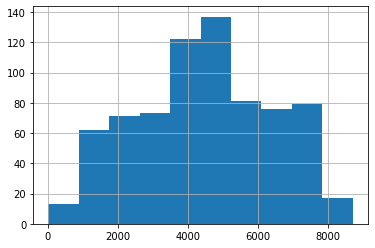

In [22]:
data['cnt'].hist() # прокат исчисляется от 0 до 9000б мы ошибаемся на 1121. Это разумно

# коэффициенты линейной модели

In [23]:
linreg.coef_

array([ 4.04856603e+02,  9.54070649e+02,  3.08108975e+01, -6.75738494e+01,
        1.03711924e+02,  1.47031025e+01, -2.93815011e+02,  6.24980791e+01,
        8.91158929e+02, -1.58978455e+02, -3.04901954e+12,  3.04901953e+12])

# выведем в удобном виде. Коэффициенты по убыванию

# видно, как прогноз страдает от мультиколлинеарности. windspeed(ms) и windspeed(mph) аж в 10**12

In [24]:
pd.DataFrame(linreg.coef_, data.columns[:-1], columns=['coef']).sort_values(by='coef', ascending=False)

,coef
windspeed(ms),3.049020e+12
yr,9.540706e+02
atemp,8.911589e+02
season,4.048566e+02
weekday,1.037119e+02
temp,6.249808e+01
mnth,3.081090e+01
workingday,1.470310e+01
holiday,-6.757385e+01
hum,-1.589785e+02


# Регуляризация поможет избавиться от этого 

In [25]:
# Для удобства заведем функцию, которая будет обучать, выводить прогноз, выводить коэффициенты.
# То же самое, что делали выше для МНК обернем в функцию
def train_validate_report(model, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names):
    model.fit(X_train_scaled, y_train)
    print("MSE=%f" % np.sqrt(mean_squared_error(y_valid, 
                                     model.predict(X_valid_scaled))))
    print('Model coefficients:')
    print(pd.DataFrame(model.coef_, 
                       feature_names, columns=['coef']).sort_values(by='coef', 
                                                                    ascending=False))

In [26]:
train_validate_report(lasso, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names=data.columns[:-1])

MSE=1120.721409
Model coefficients:
                      coef
yr              952.804560
atemp           877.159813
season          403.416439
weekday         102.643044
temp             75.953962
mnth             29.857599
workingday       14.173377
windspeed(ms)    -0.000000
holiday         -67.073435
hum            -157.547615
windspeed(mph) -187.341353
weathersit     -293.177257


# получилось чуть меньше чем при МНК, но главное- мы не видим астрономических коэффициентов. ЛАССО модель тут боролась с мультиколлинеарностью. Она занулила windspeed(ms)

# У ЛАССО коэффициент регуляризации АЛЬФА по умолчанию = 1.
# чем БОЛЬШЕ АЛЬФА, тем сильнее зануляются признаки, если АЛЬФА = 0 - это тот же МНК

In [27]:
train_validate_report(lasso_cv, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names=data.columns[:-1])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


MSE=1241.823261
Model coefficients:
                      coef
atemp           886.374386
yr              784.305733
season          272.280614
weekday          12.617944
mnth              0.000000
holiday          -0.000000
workingday        0.000000
temp              0.000000
windspeed(ms)    -0.000000
hum              -9.823886
windspeed(mph)  -77.728632
weathersit     -279.739913


# lasso_cv Переберет по кросс-валидации список параметров АЛЬФА по умолчанию. MSE получился больше, потому что значения по умолчанию, видимо, не очень подходят. можно будет настроить вручную

In [28]:
lasso_cv.alphas_ # те значения, которые он перебирает. 100 значений от 1000 до 1

array([1.00067072e+03, 9.33228862e+02, 8.70332360e+02, 8.11674872e+02,
       7.56970702e+02, 7.05953410e+02, 6.58374513e+02, 6.14002274e+02,
       5.72620576e+02, 5.34027866e+02, 4.98036175e+02, 4.64470204e+02,
       4.33166466e+02, 4.03972496e+02, 3.76746102e+02, 3.51354676e+02,
       3.27674547e+02, 3.05590379e+02, 2.84994610e+02, 2.65786927e+02,
       2.47873778e+02, 2.31167915e+02, 2.15587971e+02, 2.01058063e+02,
       1.87507423e+02, 1.74870050e+02, 1.63084394e+02, 1.52093052e+02,
       1.41842489e+02, 1.32282780e+02, 1.23367363e+02, 1.15052816e+02,
       1.07298641e+02, 1.00067072e+02, 9.33228862e+01, 8.70332360e+01,
       8.11674872e+01, 7.56970702e+01, 7.05953410e+01, 6.58374513e+01,
       6.14002274e+01, 5.72620576e+01, 5.34027866e+01, 4.98036175e+01,
       4.64470204e+01, 4.33166466e+01, 4.03972496e+01, 3.76746102e+01,
       3.51354676e+01, 3.27674547e+01, 3.05590379e+01, 2.84994610e+01,
       2.65786927e+01, 2.47873778e+01, 2.31167915e+01, 2.15587971e+01,
      

# Можно отдельно запустить lasso_cv отдельно с заданными вручную alphas

# Аналогично сделаем для ridge и ridge.sv

In [29]:
train_validate_report(ridge, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names=data.columns[:-1])

MSE=1119.560520
Model coefficients:
                      coef
yr              954.075878
atemp           730.747340
season          400.114172
temp            221.406072
weekday         103.198680
mnth             34.687740
workingday       15.334339
holiday         -69.046689
windspeed(ms)   -95.819798
windspeed(mph)  -95.819798
hum            -157.702520
weathersit     -293.899386


In [30]:
train_validate_report(ridge_cv, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names=data.columns[:-1])

MSE=1118.903543
Model coefficients:
                      coef
yr              934.401985
atemp           534.482125
temp            410.485392
season          375.585733
weekday         100.838401
mnth             48.142392
workingday       16.165284
holiday         -70.019251
windspeed(ms)   -97.770430
windspeed(mph)  -97.770430
hum            -155.174377
weathersit     -291.035853


# ridge_cv (гребневая ф-я) показывает лучшую цифру, видимо alphas попало в хороший диапазон, при чем ничего не пришлось обнулять. Взяла с одинаковыми коэффициентами скорости ветра

# Cравним это всё дело со случайным лесом. За одним исключением, у леса решений будут не коэффициенты, а оченка важности признака

In [47]:
# For regression trees
def train_validate_report_forest(model, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names):
    model.fit(X_train_scaled, y_train)
    print("MSE=%f" % np.sqrt(mean_squared_error(y_valid, 
                                     model.predict(X_valid_scaled))))
    print('Model coefficients:')
    coef = model.feature_importances_ 
    print(pd.DataFrame(coef, 
                       feature_names, columns=['Важность признаков:']).sort_values(by='Важность признаков:', 
                                                                    ascending=False))

In [51]:
forest = RandomForestRegressor(random_state=17, n_estimators=500)

In [52]:
train_validate_report_forest(forest, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names=data.columns[:-1])

MSE=1047.137676
Model coefficients:
                Важность признаков:
temp                       0.298609
atemp                      0.243309
yr                         0.199314
hum                        0.070565
season                     0.062295
weathersit                 0.030535
mnth                       0.027786
windspeed(mph)             0.020349
weekday                    0.019819
windspeed(ms)              0.019613
workingday                 0.005191
holiday                    0.002615


# можно брать и неотмасштабированные. Ничего не изменится

In [53]:
train_validate_report_forest(forest, X_train, y_train, X_valid, y_valid, feature_names=data.columns[:-1])

MSE=1046.960772
Model coefficients:
                Важность признаков:
temp                       0.298609
atemp                      0.243309
yr                         0.199314
hum                        0.070565
season                     0.062295
weathersit                 0.030535
mnth                       0.027786
windspeed(mph)             0.020349
weekday                    0.019819
windspeed(ms)              0.019613
workingday                 0.005191
holiday                    0.002615


# в итоге дерево дало лучше качество, к тому же масштабирование не нужно. Выбросы он спокойно переварит, мультиколлинеарность почти не повлияла

# по сути можно на ночь ставить 100000 деревьев, но прежде нужно исследовать значимость числа деревьев